In [59]:
%matplotlib notebook
import numpy as np
import numpy.random as npr
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [60]:
def R_FORCEDistribution(N, g, index):
    radius = np.array([0.9, 0.7, 0.72, 1.2]) * g
    num_circles = radius.size
    partition_out = 0.01 * np.ones([1,1])
    partition_in = 1 - partition_out
    distance_thresold = 1.15
    if radius[num_circles-1] > 1.55:
        per_out = partition_out * N/2
        per_in = np.zeros([1, num_circles - 1])
        radius_in = radius[:-1]
        distance = np.absolute(radius_in - distance_thresold)
        percentage = (1 / distance) **(2 * g)
        percentage_normalized = percentage / np.sum(percentage)
        for i in range(num_circles - 2):
            a = np.maximum(np.floor(percentage_normalized[i] * N/2), 0.1 * N/2)
            per_in[0][i] = a
        per_in[0][-1] = partition_in * N/2 - np.sum(per_in)        
        per = np.concatenate((per_in, per_out), axis=1)
    else:
        radius_in = radius
        distance = np.absolute(radius_in - distance_thresold)
        percentage = np.tanh(-2 * distance) + 1
        percentage_normalized = percentage / np.sum(percentage)
        for i in range(num_circles -1):
            per[0,i] = np.floor(percentage_normalized[i] * N/2)
        
        per[0,-1] = N/2 - np.sum(per)   
    count = 0
    theta = np.zeros([1, int(N/2)])
    real_part = np.zeros([1, int(N/2)])
    imag_part_pos = np.zeros([1, int(N/2)])

    if (g < 1.8):
      theta_range = [0.02, np.pi/3, np.pi / 3, 2 * np.pi/3, 2 * np.pi/3, np.pi - 0.02]
    else:
      theta_range = [4 * np.pi/5, np.pi - 0.02, 2 * np.pi/5, 4 * np.pi/5, 0.02, 2 * np.pi/5]
    for i  in range(num_circles - 1):

      theta[0,count: count + int(per[0,i])] = np.linspace(theta_range[2 * i],  theta_range[2*i + 1] , num = int(per[0][i]))

      real_part[0,count: count + int(per[0,i])]= radius[i] * np.cos(theta[0,count: count + int(per[0,i])]);
      imag_part_pos[0,count: count + int(per[0,i])]= radius[i] * np.sin(theta[0,count: count + int(per[0,i])]);
      count = count + int(per[0][i])
    
    i = num_circles - 1
    if (g < 1.4):
      theta[0,count: count + int(per[0,i])] = np.linspace(0,  1.2 * np.pi /(g**2 * (num_circles - 1)), num = int(per[0,i]))
    else:
      theta[0,count: count + int(per[0,i])] = np.linspace(0.4 * np.pi, 0.6 * np.pi, num = int(per[0,i]))

    real_part[0,count: count + int(per[0,i])]= radius[i] * np.cos(theta[0,count: count + int(per[0,i])]);
    imag_part_pos[0,count: count + int(per[0,i])]= radius[i] * np.sin(theta[0,count: count + int(per[0,i])]);

    count = count + int(per[0][i])

    imag_part_neg = - imag_part_pos;
    
    # Generate the eigenvectors matrix 
    Temp = np.random.normal(0,1,[N,N])

    Temp = Temp - np.transpose(Temp)
    
    [D,V] = LA.eig(Temp)
    
        
    eig_val = np.zeros([N]) * 1j

    M = np.zeros([N,N]) * 1j
    

    for i in range(int(N/2)):
        eig_val[2*i] = real_part[0,i] + 1j * imag_part_pos[0,i]
        eig_val[2*i + 1] = real_part[0,i] + 1j * imag_part_neg[0,i]
        
    M = np.dot(np.dot(V, np.diag(eig_val)), LA.inv(V))
    M = np.real(M)
    per = per / (N/2)
    return M, per,radius, theta



Training error:  0.005995845175527824
Testing error:  0.06562715272844286


<IPython.core.display.Javascript object>


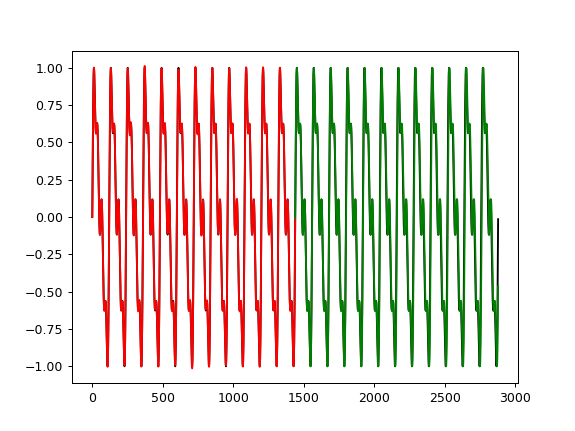

In [61]:
# Hyperparameters
N = 1000
g = 1.5
dt = .1
alpha = 1
nsecs = 120 * 12
learn_every = 2
npr.seed(seed=3)
dw = np.zeros([nREc2Out, 1])
wf = np.random.uniform(-1, 1, [N,1])
zt = np.zeros([1, simtime1.size])
zpt = np.zeros([1, simtime1.size])

x0 = 0.5 * np.random.normal(0,1,[N,1])
z0 = 0.5 * np.random.normal(0,1,[1,1])

x = x0
r = np.tanh(x)
z = z0
P = np.identity(N) * (1 / alpha)
wo = np.zeros([1, nREc2Out])
nREc2Out = N
simtime1 = np.arange(0, nsecs, dt)
simtime2 = np.arange(nsecs, 2 * nsecs, dt)


# generating MR
[M, per, radius, theta] = R_FORCEDistribution(N, g, 1)


# generationg target functions
amp = 1
freq = 1/60

ft = (amp / 1.0) * np.sin(1.0 * np.pi * freq * simtime1) + \
     (amp / 2.0) * np.sin(2.0 * np.pi * freq * simtime1) + \
     (amp / 6.0) * np.sin(3.0 * np.pi * freq * simtime1) + \
     (amp / 3.0) * np.sin(4.0 * np.pi * freq * simtime1)
scale = np.max(ft);

ft = ft/ (1 * scale);
ft2 = (amp / 1.0) * np.sin(1.0 * np.pi * freq * simtime2) + \
     (amp / 2.0) * np.sin(2.0 * np.pi * freq * simtime2) + \
     (amp / 6.0) * np.sin(3.0 * np.pi * freq * simtime2) + \
     (amp / 3.0) * np.sin(4.0 * np.pi * freq * simtime2)
ft2 = ft2/ (1 * scale);


# plt.figure()
# [D,V] = LA.eig(M)
# plt.scatter(np.real(D),np.imag(D))
# plt.show()
# 

# Training
ti = 0
for t in simtime1:
    x = (1 - dt) * x + np.dot(M, r * dt) + wf * (z * dt)
    r = np.tanh(x)
    z = np.dot(wo,r)
    zt[0,ti] = z
    r = np.tanh(x)
    
    if (ti % learn_every == 0):
        Pr = np.dot(P, r)
        k = np.transpose(Pr)/(1 + np.dot(np.transpose(r), Pr))
        P = P - np.dot(Pr,k)
        e = z - ft[ti]
        wo = wo - e * k
    zt[0,ti] = z
    ti += 1
    
error_avg = np.sum(np.absolute(ft - zt)) /len(simtime1)
print("Training error: ", error_avg)

# Testing                   
ti = 0
r = np.tanh(x);
for t in simtime2:
    x = (1 - dt) * x + np.dot(M, r * dt) + wf * (z * dt)
    r = np.tanh(x)
    z = np.dot(wo,r)

    zpt[0,ti] = z
    ti += 1
    
error_avg = np.sum(np.absolute(ft2 - zpt)) /len(simtime2)
print("Testing error: ",error_avg)

# Plotting
plt.figure()
plt.plot(simtime1, ft,'k')
plt.plot(simtime1,np.transpose(zt),'r')

plt.plot(simtime2, ft2,'k')
plt.plot(simtime2, np.transpose(zpt),'g')
plt.show()
